In [1]:
from google.colab import drive
drive.mount("/content/gdrive")
working_dir = "/content/gdrive/MyDrive/4th Year/7th Semester/EE405 Undergraduate Project I/G-08-2023/Shared Items"

Mounted at /content/gdrive


In [ ]:
import os
import pickle
from google.colab import drive
from PIL import Image
import numpy as np

## Define the path to the folder containing the images in Google Drive
image_folder_path = f"{working_dir}/Datasets/Labelme Dataset 01/original_images"
mask_folder_path = f"{working_dir}/Datasets/Labelme Dataset 01/masks_processed"

## Get the list of image filenames from the folder
image_filenames = os.listdir(image_folder_path)
mask_filenames = os.listdir(mask_folder_path)

## Read and append each file's data as numerical arrays to the list
def get_data(filenames,folder_path, masks=False):
    ## Create an empty list to store the image data
    data = []
    ## Read and append each image file"s data as numerical arrays to the list
    for filename in filenames:
        file_path = os.path.join(folder_path, filename)
        input_file = Image.open(file_path)
        array = np.array(input_file)
        if masks:
            array = np.int64(np.round(array/128*255))
            np.expand_dims(array, axis=2)
        else:
            array = array[:,:,:3]
        data.append(array)
    return data
image_data = get_data(image_filenames,image_folder_path)
mask_data = get_data(mask_filenames,mask_folder_path,True)

## Define the filename for the .p file
image_output_filename = f"{working_dir}/Datasets/Pickle/test_images_new_train.p"
mask_output_filename = f"{working_dir}/Datasets/Pickle/test_masks_new_train.p"

## Save the image data as a .p file using pickle
def write_file(output_filename,data):
    with open(output_filename, "wb") as file:
        pickle.dump(data, file)
write_file(image_output_filename,image_data)
write_file(mask_output_filename,mask_data)


original images shape: (12764, 80, 160, 3), max: 255, min: 0


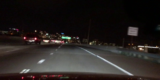

original labels shape: (12764, 80, 160, 1), max: 255, min: 0


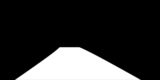

test images shape: (5, 80, 160, 3), max: 255, min: 0


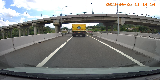

test labels shape: (5, 80, 160), max: 255, min: 0


TypeError: ignored

In [ ]:
## Doublecheck data
input_paths = {}
input_paths["original images"] = f"{working_dir}/Datasets/Pickle/full_CNN_train.p"
input_paths["original labels"] = f"{working_dir}/Datasets/Pickle/full_CNN_labels.p"
input_paths["test images"] = f"{working_dir}/Datasets/Pickle/test_images.p"
input_paths["test labels"] = f"{working_dir}/Datasets/Pickle/test_masks.p"
for key,value in input_paths.items():
    with open(value, "rb") as file:
        data_array = np.array(pickle.load(file))
        print(f"{key} shape: {data_array.shape}, max: {np.max(data_array)}, min: {np.min(data_array)}")
        if len(data_array.shape) == 4:
            image = Image.fromarray(data_array[0,:,:,:].squeeze())
            # print(data_array[0,:,:,:])
        else:
            image = Image.fromarray(data_array[0,:,:].squeeze())
            # print(data_array[0,:,:])
        image.show()
    file.close()